In [1]:
import numpy as np
import scanpy as sc
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection
import anndata as ad
%matplotlib inline

/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Cross_platform_mouse_brain(MERFISH,STARmapPLUS,CosMx)

In [2]:
adata=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/Cross_platform_mouse_brain.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 140951 × 87
    obs: 'batch'
    uns: 'log1p', 'pca'
    obsm: 'BANKSY', 'NicheCompass', 'SpaLP', 'X_pca', 'spatial'
    varm: 'PCs'

In [4]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

In [5]:
#Since lack ground truth label, we only calculate the batch effect.

bm = Benchmarker(adata,
                 batch_key="batch",
                 label_key='batch',
                 bio_conservation_metrics=None,
                 batch_correction_metrics=BatchCorrection(bras=False,kbet_per_label=False),
                 embedding_obsm_keys=["BANKSY","NicheCompass","SpaLP"],
                 pre_integrated_embedding_obsm_key="Unintegrated",
                 n_jobs=-1)

Metrics:   0%|                                                                                                                                                     | 0/5 [00:00<?, ?it/s, Batch correction: ilisi_knn]WARNING:2026-02-11 14:14:04,805:jax._src.xla_bridge:794: An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.

Metrics:  20%|██████████████████████████▍                                                                                                         | 1/5 [00:01<00:04,  1.11s/it, Batch correction: graph_connectivity]/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  33%|███████████████████████████████████████████████████████▋                                                          

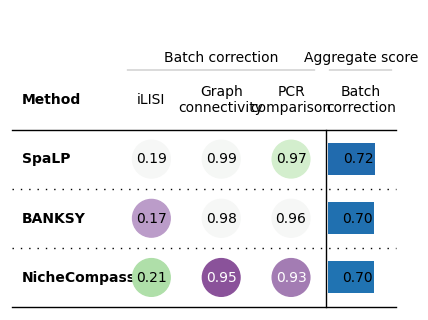

In [6]:
bm.benchmark()# pipeline

bm.plot_results_table(min_max_scale=False)

In [9]:
df = bm.get_results(min_max_scale=False)
print(df)

                         iLISI Graph connectivity    PCR comparison  \
Embedding                                                             
BANKSY                 0.17043           0.984515          0.957894   
NicheCompass          0.213706           0.952365          0.930383   
SpaLP                 0.194084           0.985082          0.968928   
Metric Type   Batch correction   Batch correction  Batch correction   

             Batch correction  
Embedding                      
BANKSY                0.70428  
NicheCompass         0.698818  
SpaLP                0.716031  
Metric Type   Aggregate score  


# Within_platform_MERSCOPE_mouse_brain

In [10]:
adata=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/Within_platform_MERSCOPE_mouse_brain.h5ad')

In [11]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

In [12]:
#Since lack ground truth label, we only calculate the batch effect.
bm = Benchmarker(adata,
                 batch_key="batch",
                 label_key='batch',
                 bio_conservation_metrics=None,
                 batch_correction_metrics=BatchCorrection(bras=False,kbet_per_label=False),
                 embedding_obsm_keys=["NicheCompass",'SpaLP','BANKSY'],
                 pre_integrated_embedding_obsm_key="Unintegrated",
                 n_jobs=-1)

Metrics:  20%|██████████████████████████▍                                                                                                         | 1/5 [00:02<00:08,  2.09s/it, Batch correction: graph_connectivity]/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  33%|███████████████████████████████████████████████████████▋                                                                                                               | 1/3 [00:05<00:10,  5.47s/it]
                                                                                                                                                                                                                      
Metrics:  20%|██████████████████████████▍                                           

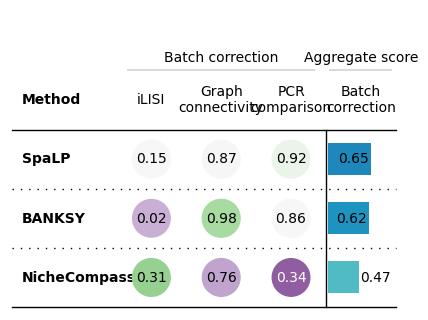

In [13]:
bm.benchmark()# pipeline

bm.plot_results_table(min_max_scale=False)

In [17]:
df = bm.get_results(min_max_scale=False)
print(df)

                         iLISI Graph connectivity    PCR comparison  \
Embedding                                                             
NicheCompass          0.305069           0.763442          0.344908   
SpaLP                 0.147074           0.874242          0.922051   
BANKSY                0.019719           0.983521          0.859122   
Metric Type   Batch correction   Batch correction  Batch correction   

             Batch correction  
Embedding                      
NicheCompass         0.471139  
SpaLP                0.647789  
BANKSY               0.620787  
Metric Type   Aggregate score  


# MERFISH_76_77_78

In [18]:
adata=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/general/STARmapPLUS/SCIB_MERFISH76_77_78.h5ad')

In [19]:
adata.obs['batch']=adata.obs['slice']

In [20]:
bm = Benchmarker(adata,
                 batch_key="batch",
                 label_key='major_brain_region',
                 bio_conservation_metrics=None,
                 batch_correction_metrics=BatchCorrection(),
                 embedding_obsm_keys=["NicheCompass",'SpaLP','BANKSY'],
                 pre_integrated_embedding_obsm_key="Unintegrated",
                 n_jobs=-1)

Metrics:  60%|███████████████████████████████████████████████████████████████████████████████▏                                                    | 3/5 [01:22<01:05, 32.91s/it, Batch correction: graph_connectivity]/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  33%|███████████████████████████████████████████████████████▋                                                                                                               | 1/3 [01:24<02:48, 84.30s/it]
                                                                                                                                                                                                                      
Metrics:  60%|██████████████████████████████████████████████████████████████████████

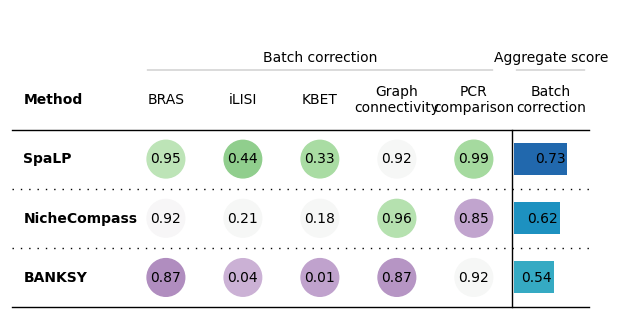

In [21]:
bm.benchmark()# pipeline

bm.plot_results_table(min_max_scale=False)

In [22]:
df = bm.get_results(min_max_scale=False)
print(df)

                          BRAS             iLISI              KBET  \
Embedding                                                            
NicheCompass           0.91815          0.213228          0.175002   
SpaLP                 0.946577          0.440198          0.334335   
BANKSY                0.873613           0.04118          0.007133   
Metric Type   Batch correction  Batch correction  Batch correction   

             Graph connectivity    PCR comparison Batch correction  
Embedding                                                           
NicheCompass           0.962988           0.85379         0.624632  
SpaLP                  0.922778          0.986149         0.726007  
BANKSY                 0.867708           0.92002         0.541931  
Metric Type    Batch correction  Batch correction  Aggregate score  


# STARmapPLUS_sagittal1-2-3

In [2]:
adata=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/Within_platform_STARmapPLUS.h5ad')
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

In [3]:
adata

AnnData object with n_obs × n_vars = 422673 × 1022
    obs: 'Main_molecular_cell_type', 'Sub_molecular_cell_type', 'Main_molecular_tissue_region', 'Sub_molecular_tissue_region', 'Molecular_spatial_cell_type', 'batch'
    uns: 'log1p', 'pca'
    obsm: 'BANKSY', 'NicheCompass', 'SpaLP', 'X_pca', 'spatial', 'Unintegrated'
    varm: 'PCs'
    layers: 'counts'

In [4]:
bm = Benchmarker(adata,
                 batch_key="batch",
                 label_key='Main_molecular_tissue_region',
                 bio_conservation_metrics=None,
                 batch_correction_metrics=BatchCorrection(),
                 embedding_obsm_keys=["NicheCompass",'SpaLP','BANKSY'],
                 pre_integrated_embedding_obsm_key="Unintegrated",
                 n_jobs=-1)

Metrics:   0%|                                                                                                                                                          | 0/5 [00:00<?, ?it/s, Batch correction: bras]WARNING:2026-02-17 10:46:57,703:jax._src.xla_bridge:794: An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.

Metrics:  40%|██████████████████████████████████████████████████████▍                                                                                 | 2/5 [01:49<02:16, 45.52s/it, Batch correction: kbet_per_label]

INFO     ENTm consists of a single batch or is too small. Skip.                                                    
INFO     HY consists of a single batch or is too small. Skip.                                                      
INFO     MYdp consists of a single batch or is too small. Skip.                                                    



Metrics:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 3/5 [04:58<03:41, 110.64s/it, Batch correction: graph_connectivity]/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  33%|███████████████████████████████████████████████████████▎                                                                                                              | 1/3 [05:02<10:04, 302.22s/it]
                                                                                                                                                                                                                      
Metrics:  40%|██████████████████████████████████████████████████████▍              

INFO     ENTm consists of a single batch or is too small. Skip.                                                    
INFO     HY consists of a single batch or is too small. Skip.                                                      
INFO     MYdp consists of a single batch or is too small. Skip.                                                    



Metrics:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 3/5 [04:16<03:25, 102.80s/it, Batch correction: graph_connectivity]/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 2/3 [09:21<04:36, 276.69s/it]
                                                                                                                                                                                                                      
Metrics:  40%|██████████████████████████████████████████████████████▍              

INFO     ENTm consists of a single batch or is too small. Skip.                                                    
INFO     HY consists of a single batch or is too small. Skip.                                                      
INFO     MYdp consists of a single batch or is too small. Skip.                                                    



Metrics:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 3/5 [04:09<03:21, 100.93s/it, Batch correction: graph_connectivity]/home/dbj/anaconda3/envs/scib/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [13:32<00:00, 270.89s/it]

                                                                                                                                                                                                                      

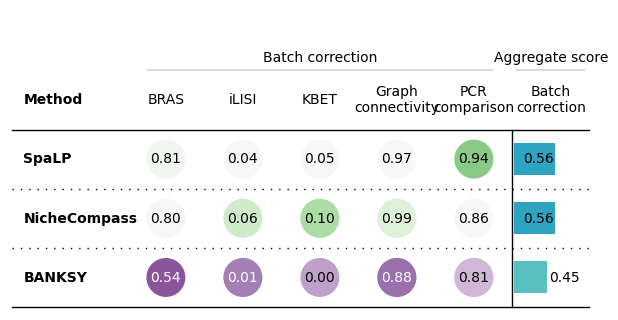

In [5]:
bm.benchmark()# pipeline

bm.plot_results_table(min_max_scale=False)

In [6]:
df = bm.get_results(min_max_scale=False)
print(df)

                          BRAS             iLISI              KBET  \
Embedding                                                            
NicheCompass          0.799161          0.056466          0.095744   
SpaLP                 0.812721           0.04317          0.050804   
BANKSY                0.540865          0.013393          0.001321   
Metric Type   Batch correction  Batch correction  Batch correction   

             Graph connectivity    PCR comparison Batch correction  
Embedding                                                           
NicheCompass           0.988456          0.864725         0.560911  
SpaLP                  0.965867          0.941541         0.562821  
BANKSY                 0.884778           0.81281         0.450633  
Metric Type    Batch correction  Batch correction  Aggregate score  
